# Problem 1
Context
CNBE, a prominent news channel, is gearing up to provide insightful coverage of recent elections, recognizing the importance of data-driven analysis. A comprehensive survey has been conducted, capturing the perspectives of 1525 voters across various demographic and socio-economic factors. This dataset encompasses 9 variables, offering a rich source of information regarding voters' characteristics and preferences.

Objective
The primary objective is to leverage machine learning to build a predictive model capable of forecasting which political party a voter is likely to support. This predictive model, developed based on the provided information, will serve as the foundation for creating an exit poll. The exit poll aims to contribute to the accurate prediction of the overall election outcomes, including determining which party is likely to secure the majority of seats.

##### Data Description

vote: Party choice: Conservative or Labour

age: in years

economic.cond.national: Assessment of current national economic conditions, 1 to 5.

economic.cond.household: Assessment of current household economic conditions, 1 to 5.

Blair: Assessment of the Labour leader, 1 to 5.

Hague: Assessment of the Conservative leader, 1 to 5.

Europe: an 11-point scale that measures respondents' attitudes toward European integration.   High scores represent ‘Eurosceptic’ sentiment.

political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.

gender: female or male.

## Answers:

In [140]:
#import libary
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [141]:
# Read the Excel file into a DataFrame
df = pd.read_excel("Election_Data.xlsx", sheet_name="Election_Dataset_Two Classes")

In [142]:
#print first 5 rows of the data set
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [143]:
#drop the unnamed column
df=df.drop("Unnamed: 0",axis=1)

In [144]:
#columns of the data frame
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

## 1.1- Define the problem and perform Exploratory Data Analysis
- Problem definition - Check shape, Data types, and statistical summary - Univariate analysis - Multivariate analysis - Use appropriate visualizations to identify the patterns and insights - Key meaningful observations on individual variables and the relationship between variables


In [145]:
#check shape of the data set
df.shape

(1525, 9)

data set have 1525 rows and 9 columns

In [146]:
#check the data types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


the data set have 7 integer ,2 object type columns.

In [147]:
#statistical summary 
df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [148]:
#create data frames with numerical data columns and object columns 
df_num=df.select_dtypes("int")
df_cat=df.select_dtypes("object")

#### Univariate analysis 

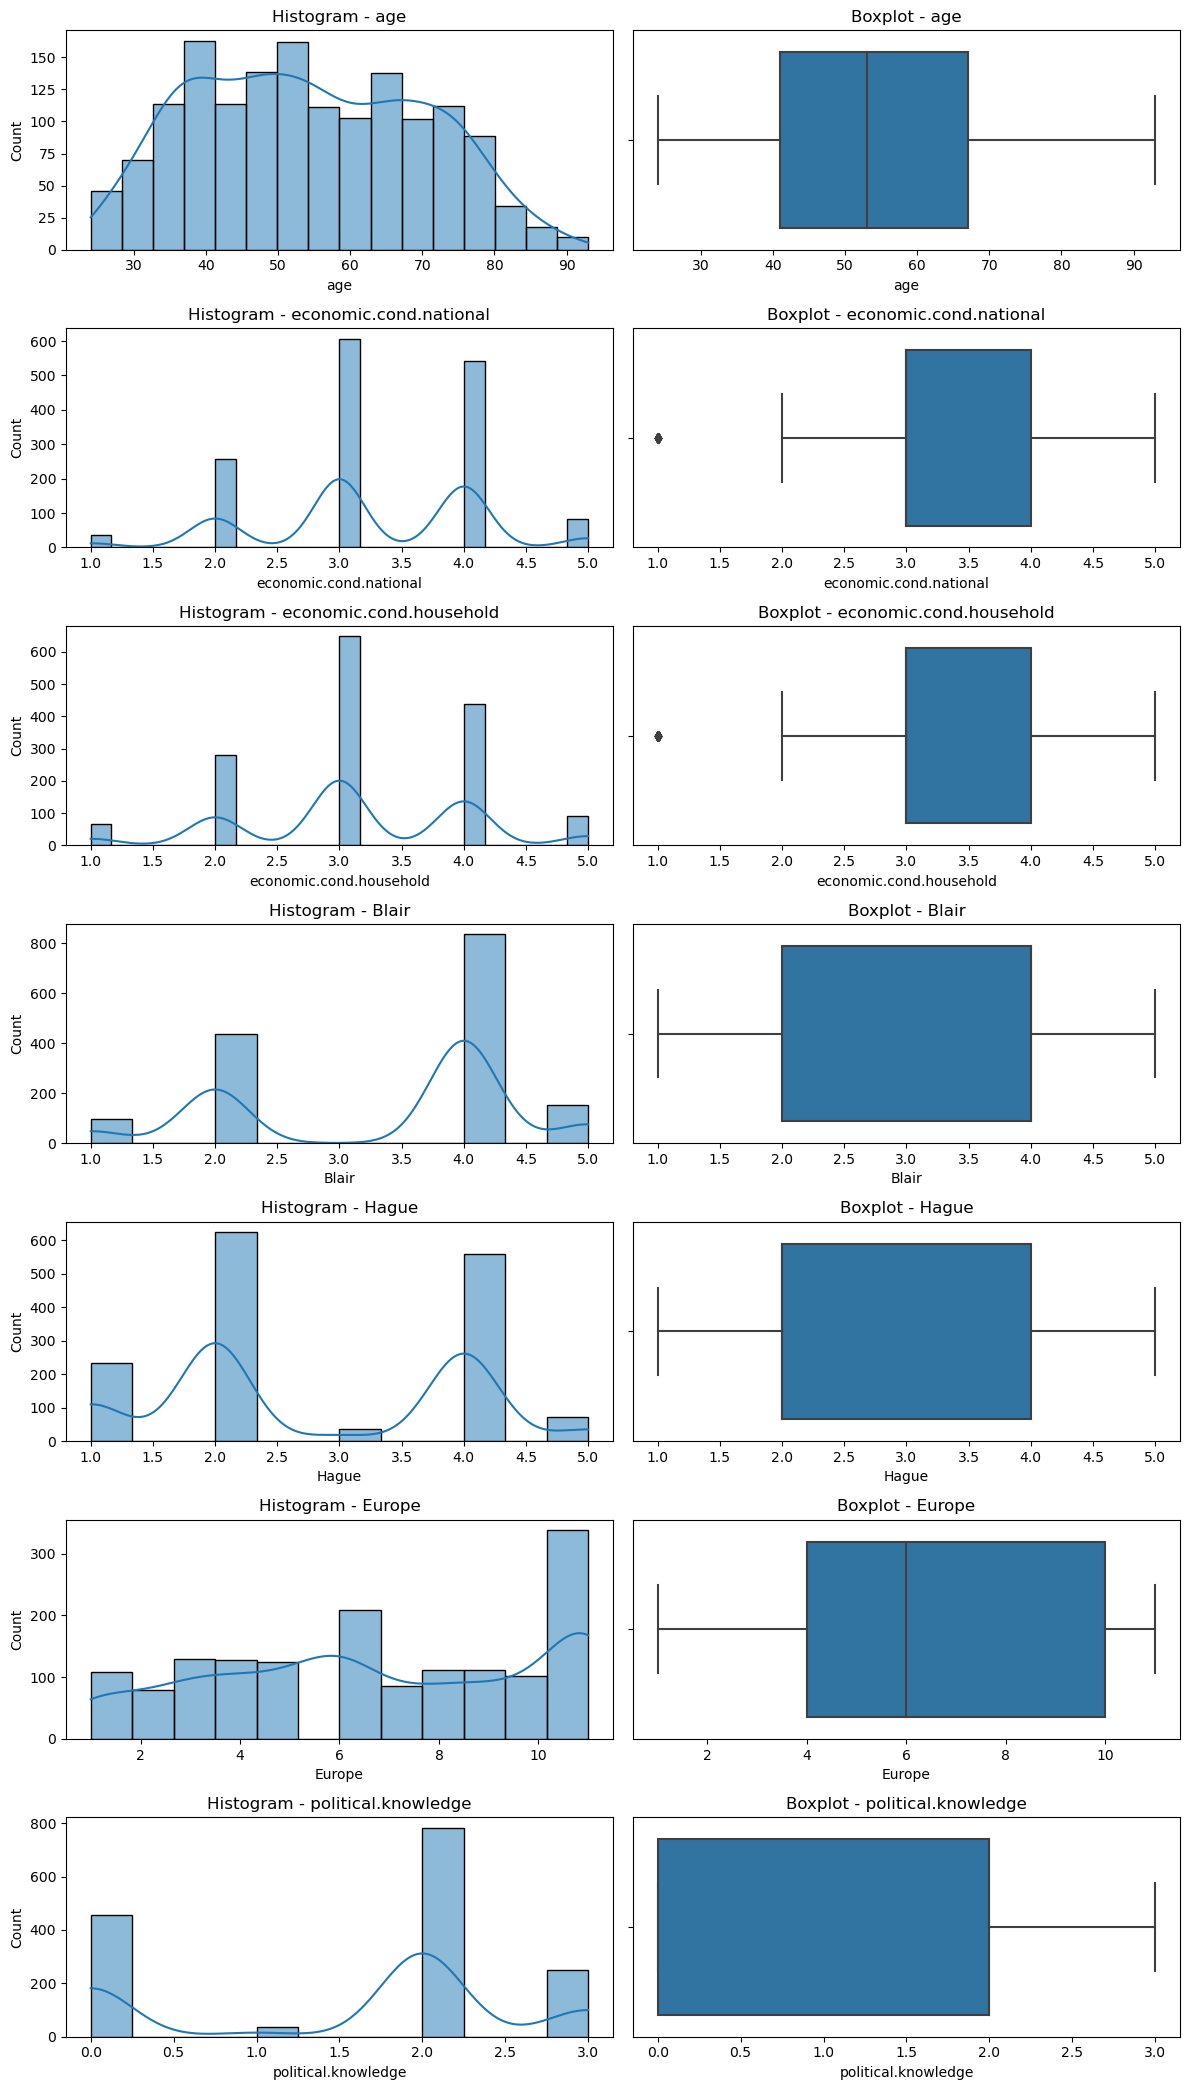

In [239]:
### Univariate analysis
fig, axes = plt.subplots(nrows=len(df_num.columns), ncols=2,figsize=(12, 3 * len(df_num.columns)))
# Loop through numerical columns and create histograms and boxplots
for i, col in enumerate(df_num.columns):
    # Histogram
    sns.histplot(df[col], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histogram - {col}')

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot - {col}')

# Adjust layout
plt.tight_layout()
plt.show()

outliers presents in lower values of 'economic.cond.national ' and
'economic.cond.household' columns.

In [240]:
#describe the age column
df_num.age.describe()

count    1525.000000
mean       54.182295
std        15.711209
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64

the mean of the voters age  is 54

In [241]:
# describe economic.cond.national column
df_num["economic.cond.national"].describe()

count    1525.000000
mean        3.245902
std         0.880969
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.national, dtype: float64

50% of the assessment of current national economic conditions is 3.


In [242]:
# describe economic.cond.household column
df_num["economic.cond.household"].describe()

count    1525.000000
mean        3.140328
std         0.929951
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.household, dtype: float64

75% of the assessment of current household economic conditions

In [243]:
# describe  Blair column
df_num.Blair.describe()

count    1525.000000
mean        3.334426
std         1.174824
min         1.000000
25%         2.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Blair, dtype: float64

mean of the Assessment of the Labour leader is 3

In [244]:
# describe Hauge column
df_num.Hague.describe()

count    1525.000000
mean        2.746885
std         1.230703
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: Hague, dtype: float64

75% of the assessment of the Conservative leader is 4.

In [245]:
## describe Europe column
df_num.Europe.describe()

count    1525.000000
mean        6.728525
std         3.297538
min         1.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        11.000000
Name: Europe, dtype: float64

50% of respondents attitudes toward European integration is 6.728

In [246]:
# describe political.knowledge column
df_num["political.knowledge"].describe()

count    1525.000000
mean        1.542295
std         1.083315
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: political.knowledge, dtype: float64

 mean of the Knowledge of parties' positions on European integration' is 1.54

In [247]:
#columns of df_cat
df_cat.columns

Index(['vote', 'gender'], dtype='object')

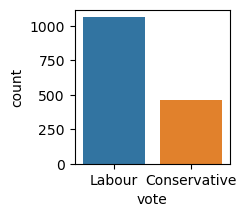

In [248]:
#countplot of vote 
plt.figure(figsize=(2,2))
sns.countplot(data=df,x="vote");

more voters are labour party choice

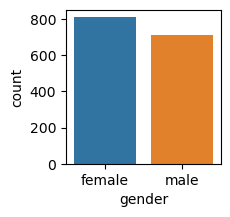

In [249]:
#countplot of gender column
plt.figure(figsize=(2,2))
sns.countplot(data=df,x="gender");

more voter are female

#### multivariate analysis

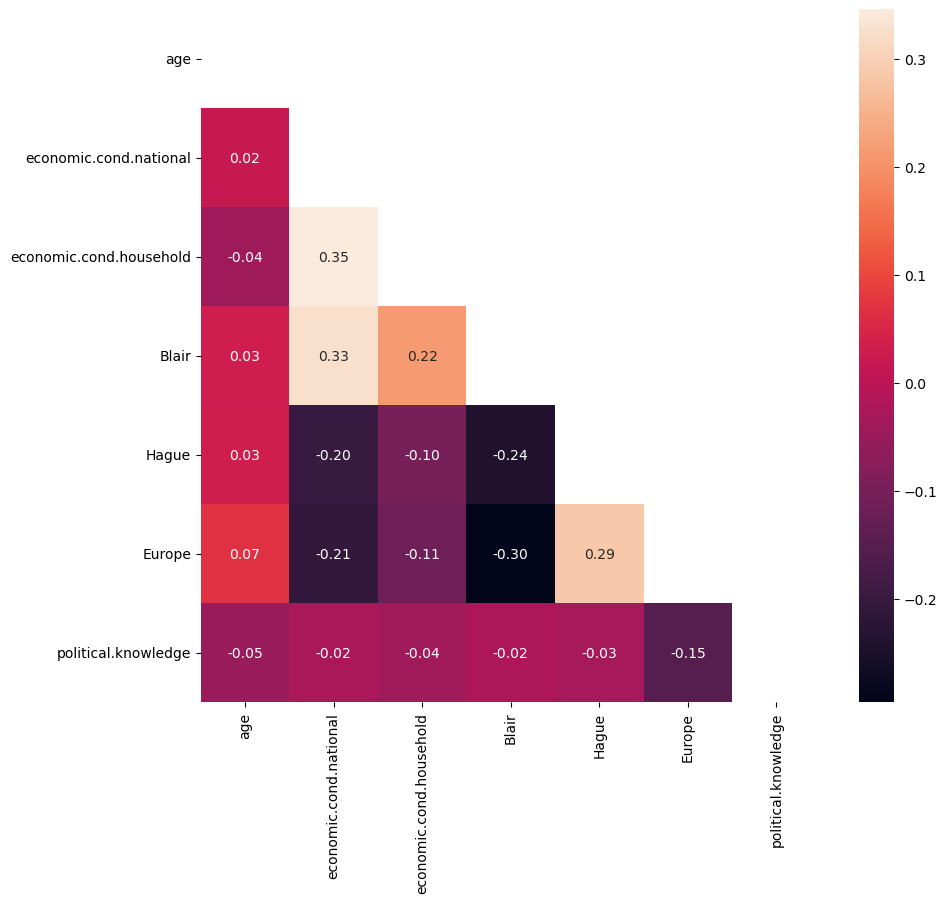

In [250]:
#plot the correlation map
corr = df_num.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=np.bool_)) 
fig = plt.subplots(figsize=(10, 9))
sns.heatmap(df_num.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

* there is no strong relationship present in between variables
* in this frame  highly related one is 'economic.cond.national ' and  'economic.cond.household ' this not huge relationship.

<Figure size 1000x1000 with 0 Axes>

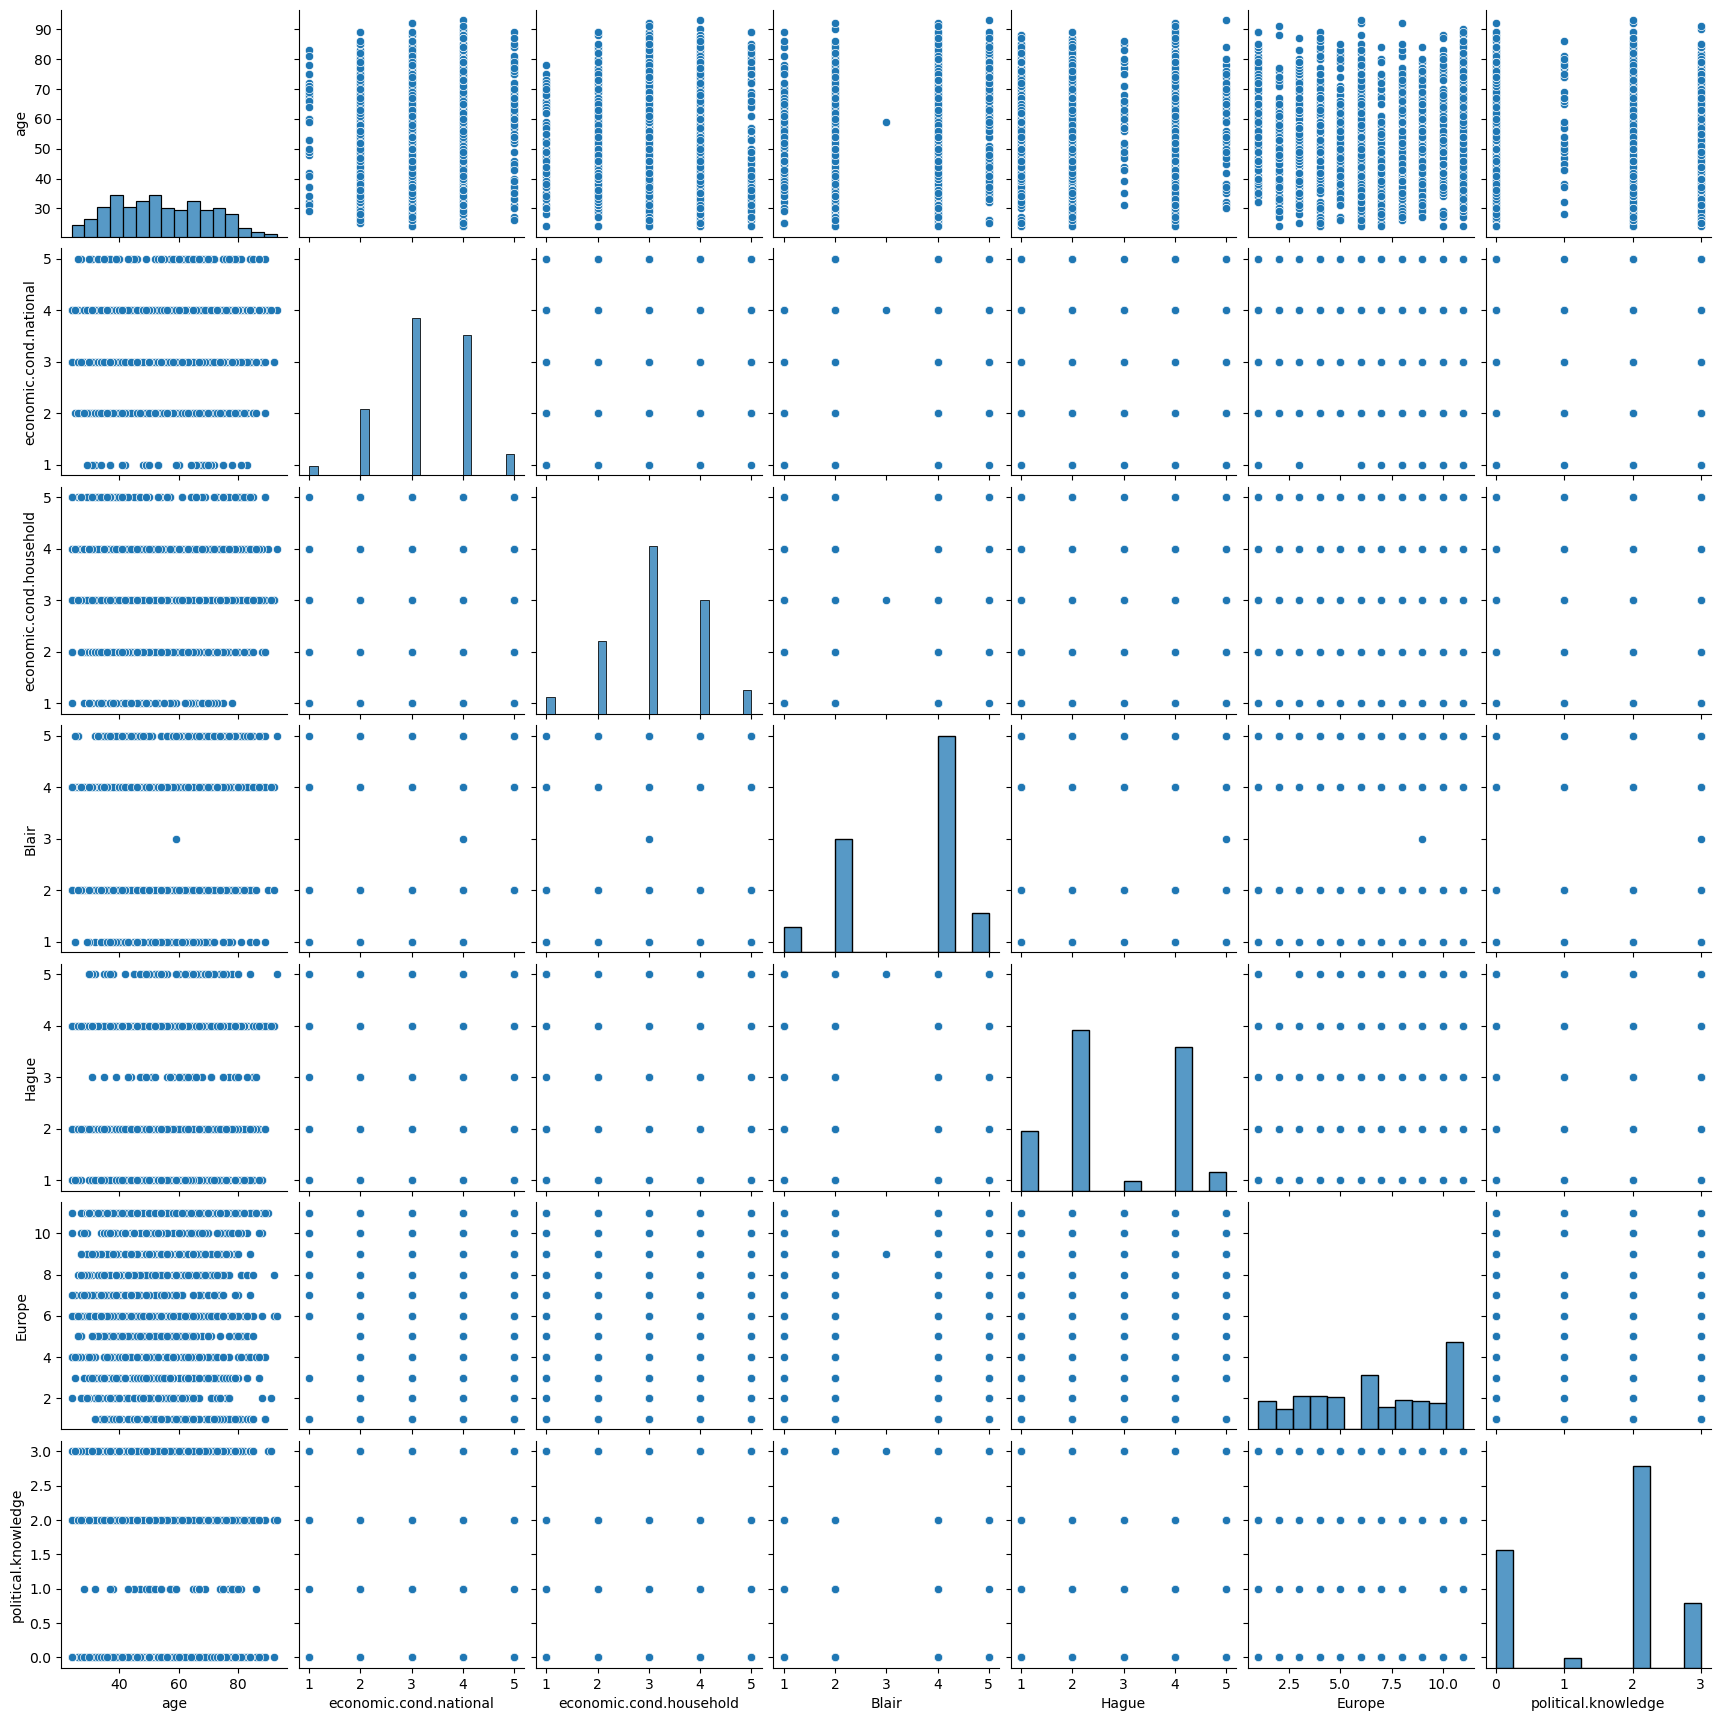

In [251]:
#pair plot
plt.figure(figsize=(10,10))
sns.pairplot(df_num)
plt.show()

In [252]:
df_cat.columns

Index(['vote', 'gender'], dtype='object')

<Axes: xlabel='vote', ylabel='age'>

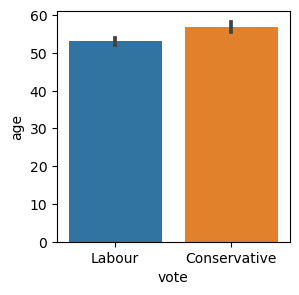

In [253]:
#barplot of vote vs age
plt.figure(figsize=(3,3))
sns.barplot(data=df,y="age",x="vote")

after 50 age most of voters are select conservative party.

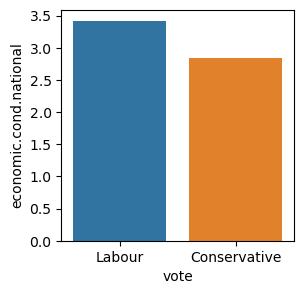

In [254]:
#barplot of 'economic.cond.national' vs "vote"
plt.figure(figsize=(3,3))
sns.barplot(data=df,y='economic.cond.national',x="vote",errorbar=None);

economic condition of the nation is high in labour party choice.

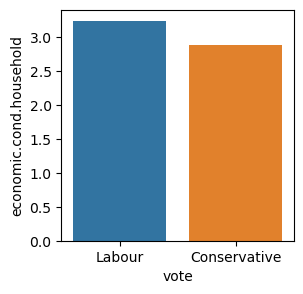

In [255]:
#barplot of 'economic.cond.household" vs "vote"
plt.figure(figsize=(3,3))
sns.barplot(data=df,y='economic.cond.household',x="vote",errorbar=None);

economical condition of household is high in labour party choice

In [256]:
#df_num columns
df_num.columns

Index(['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge'],
      dtype='object')

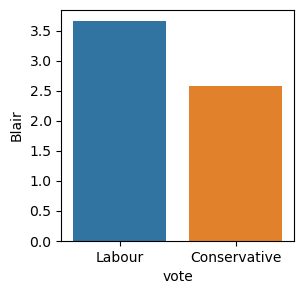

In [257]:
#'Blair' vs "vote"
plt.figure(figsize=(3,3))
sns.barplot(data=df,y='Blair',x="vote",errorbar=None);

Assessment of the Labour leader is high in labour party choice.

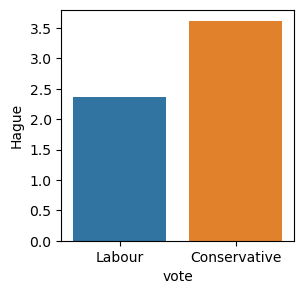

In [258]:
#bar plot of 'Hague'vs "vote"
plt.figure(figsize=(3,3))
sns.barplot(data=df,y='Hague',x="vote",errorbar=None);

 Assessment of the Conservative leader is high in conservative party choice

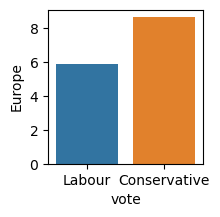

In [259]:
#barplot of  y='Hague' vs "vote"
plt.figure(figsize=(2,2))
sns.barplot(data=df,y='Hague',x="vote",errorbar=None);

attitudes toward European integration is  High in conservative party choice.

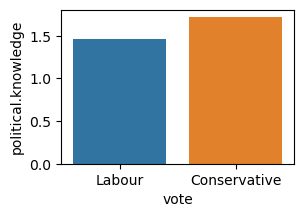

In [260]:
#barplot of 'political.knowledge'vs"vote"
plt.figure(figsize=(3,2))
sns.barplot(data=df,y='political.knowledge',x="vote",errorbar=None);

political knowledge is high in conservative party voters.

In [261]:
df_num.columns

Index(['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge'],
      dtype='object')

### Use appropriate visualizations to identify the patterns and insights - Key meaningful observations on individual variables and the relationship between variables

### insights:
###### Data Overview:
The dataset contains 1525 rows and 9 columns.
There are 7 integer type columns and 2 object type columns.
###### Outliers:
Outliers are present in lower values of 'economic.cond.national' and 'economic.cond.household' columns.
###### Demographics:
The average age of voters is 54, and there is a shift towards the Conservative party after the age of 50.
The dataset has a higher proportion of female voters.
###### Economic Conditions:
Outliers in lower values of 'economic.cond.national' and 'economic.cond.household' suggest potential economic concerns among some respondents.
Labour party voters tend to have higher economic conditions at both the national and household levels.
###### Leader Assessments:
Voters, on average, rate the Labour leader higher (mean of 3.75) compared to the more polarized assessments of the Conservative leader.
There is a correlation between leader assessments and political party choice.
##### Attitudes Toward European Integration:
Attitudes toward European integration vary widely among respondents.
Conservative party supporters tend to have higher scores, reflecting more conservative views on European integration.
###### Political Knowledge:
On average, voters have a relatively low political knowledge score (mean of 1.54).
Conservative party voters show higher political knowledge compared to Labour party voters.
###### Party Preferences:
The Labour party is more popular among voters in the dataset.
After the age of 50, there is a notable shift towards the Conservative party.
###### Relationships Between Variables:
A moderate relationship exists between 'economic.cond.national' and 'economic.cond.household,' indicating a potential interdependence in how respondents perceive economic conditions.
While correlations exist between economic conditions, party choice, and leader assessments, no strong relationships are evident.
###### Overall Observations:
The dataset portrays a diverse range of opinions and preferences among voters.
Economic conditions significantly influence party choice, with Labour party voters favoring higher economic conditions.
Age, leader assessments, and attitudes toward European integration contribute to the nuanced landscape of political choices.
###### Demographics:
The average age of voters is 54, and there is a shift towards the Conservative party after the age of 50.
The dataset has a higher proportion of female voters.
###### Economic Conditions:
Outliers in lower values of 'economic.cond.national' and 'economic.cond.household' suggest potential economic concerns among some respondents.
Labour party voters tend to have higher economic conditions at both the national and household levels.
###### Leader Assessments:
Voters, on average, rate the Labour leader higher (mean of 3.75) compared to the more polarized assessments of the Conservative leader.
There is a correlation between leader assessments and political party choice.
###### Attitudes Toward European Integration:
Attitudes toward European integration vary widely among respondents.
Conservative party supporters tend to have higher scores, reflecting more conservative views on European integration.
###### Political Knowledge:
On average, voters have a relatively low political knowledge score (mean of 1.54).
Conservative party voters show higher political knowledge compared to Labour party voters.
###### Party Preferences:
The Labour party is more popular among voters in the dataset.
After the age of 50, there is a notable shift towards the Conservative party.
###### Relationships Between Variables:
A moderate relationship exists between 'economic.cond.national' and 'economic.cond.household,' indicating a potential interdependence in how respondents perceive economic conditions.
While correlations exist between economic conditions, party choice, and leader assessments, no strong relationships are evident.
###### Overall Observations:
The dataset portrays a diverse range of opinions and preferences among voters.
Economic conditions significantly influence party choice, with Labour party voters favoring higher economic conditions.
Age, leader assessments, and attitudes toward European integration contribute to the nuanced landscape of political choices.

## 1.2-Data Pre-processing
Prepare the data for modelling: - Outlier Detection(treat, if needed)) - Encode the data - Data split - Scale the data (and state your reasons for scaling the features)

In [149]:
#check missing values
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

no missing values in te data set

In [150]:
df_num.columns

Index(['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge'],
      dtype='object')

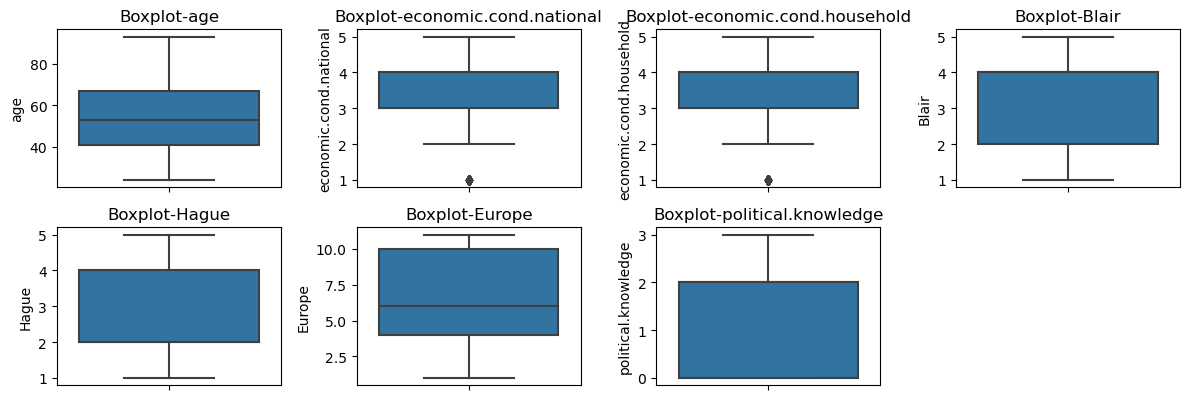

In [151]:
#checking outliers using boxplot
plt.figure(figsize = (12,10))
lists = df_num.columns
for i in range(len(lists)):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(y = df[lists[i]], data = df_num)
    plt.title('Boxplot-{}'.format(lists[i]))
    plt.tight_layout()

outliers are present in the lower values of 'economic.cond.national', 'economic.cond.household''economic.cond.national', 'economic.cond.household'.

In [152]:
#remove outliers
def remove_outliers(col):
    q1,q3=np.percentile(col,[25,75])
    IQR=q3-q1
    low=q1-(1.5)*IQR
    hig=q3+(1.5)*IQR
    return(low,hig)

In [153]:
for i in (df_num.columns):
    lw,hi=remove_outliers(df_num[i])
    df_num[i]=np.where(df_num[i]<lw,lw,df_num[i])
    df_num[i]=np.where(df_num[i]>hi,hi,df_num[i])

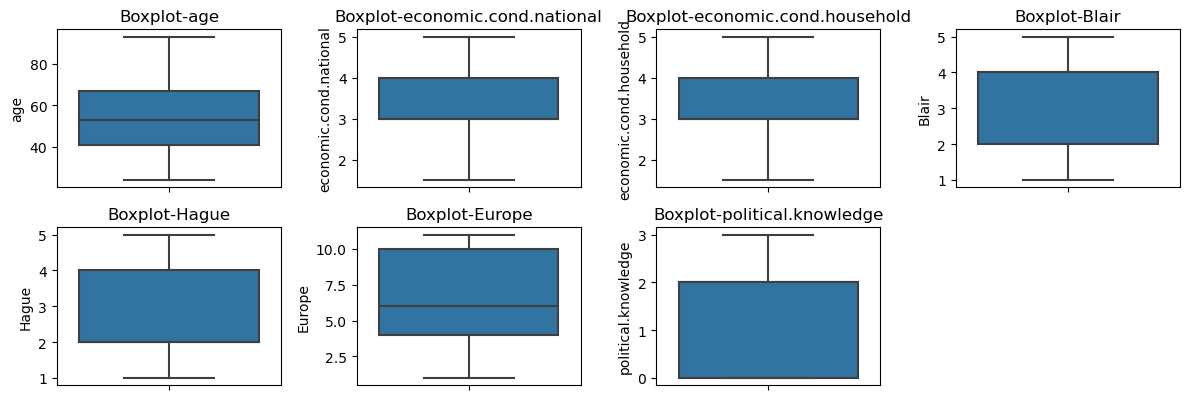

In [154]:
#checking outliers using boxplot after treatment
plt.figure(figsize = (12,10))
lists = df_num.columns
for i in range(len(lists)):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(y = df_num[lists[i]], data = df_num)
    plt.title('Boxplot-{}'.format(lists[i]))
    plt.tight_layout()

#### Encode the data 

In [156]:
#converting all obect columns to categorical column
for col in df_cat.columns:
    if df_cat[col].dtype=="object":
        print("\n")
        print("colum:",col)
        print(pd.Categorical(df_cat[col].unique()))
        print(pd.Categorical(df_cat[col].unique()).codes)
        df_cat[col]=pd.Categorical(df_cat[col]).codes




colum: vote
['Labour', 'Conservative']
Categories (2, object): ['Conservative', 'Labour']
[1 0]


colum: gender
['female', 'male']
Categories (2, object): ['female', 'male']
[0 1]


In [157]:
#create new data frame
df_nw=pd.DataFrame()

In [158]:
#copy the df_cat to new data frame
df_nw=df_cat.copy()

In [159]:
# merging df_nw and df_num
df_nw = pd.concat([df_nw, df_num], axis=1)

In [160]:
df_nw.columns

Index(['vote', 'gender', 'age', 'economic.cond.national',
       'economic.cond.household', 'Blair', 'Hague', 'Europe',
       'political.knowledge'],
      dtype='object')

In [161]:
#first 5 rows of new data frame
df_nw.head()

,vote,gender,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
0,1,0,43.0,3.0,3.0,4.0,1.0,2.0,2.0
1,1,1,36.0,4.0,4.0,4.0,4.0,5.0,2.0
2,1,1,35.0,4.0,4.0,5.0,2.0,3.0,2.0
3,1,0,24.0,4.0,2.0,2.0,1.0,4.0,0.0
4,1,1,41.0,2.0,2.0,1.0,1.0,6.0,2.0


##### Data split 

#### Scale the data (and state your reasons for scaling the features)

In [162]:
#split data
y=df_nw["vote"]
x=df_nw.drop("vote", axis=1)

we are not going to scale the data for  logistic regression,LDA and Naive Baye's model as it is not necessary.

But in case of KNN it is necessary to scale the data,as it a distance based algorithm (typically based on Euclidean distance ).scalling te data gives similar weightage to all the variables.

## 1-3-Model Building
- Metrics of Choice (Justify the evaluation metrics) - Model Building (KNN, Naive bayes, Bagging, Boosting).

## 1-4-Model Performance evaluation
- Check the confusion matrix and classification metrics for all the models (for both train and test dataset) - ROC-AUC score and plot the curve - Comment on all the model performance

#### ANSWERS:

In [163]:
############# Metrics of Choice (Justify the evaluation metrics)

here dealing with a classification problem like predicting political party choices
##### Accuracy:  
Accuracy is a common metric that measures the overall correctness of predictions. It is suitable when the classes are balanced, and there is no significant class imbalance in the dataset.
##### Precision and Recall:
Justification: Precision and recall provide insights into the model's ability to make correct positive predictions and capture all actual positive instances, respectively. In the context of predicting political party choices, both precision and recall are essential. For example:
Precision: To measure the accuracy of positive predictions, especially important for avoiding false positives when reporting party choices.
Recall: To assess the ability of the model to identify all instances of a particular party choice, important for avoiding false negatives.
##### F1-Score:
Justification: The F1-Score is the harmonic mean of precision and recall. It is useful when there is an imbalance between classes and you want to balance the trade-off between false positives and false negatives.
##### Area Under the ROC Curve (AUC-ROC):
Justification: AUC-ROC evaluates the model's ability to distinguish between different classes. It is suitable when there is a need to understand the model's performance across different probability thresholds. Useful for binary classification problems.
##### Confusion Matrix:
Justification: The confusion matrix provides a detailed breakdown of true positives, true negatives, false positives, and false negatives. It is valuable for understanding the types of errors the model makes


In [164]:
 #### Model Building (KNN, Naive bayes, Bagging, Boosting).

##### KNN MODEL

scaling is necessary in KNN MODEL.

In [165]:
x1=x.copy()
# scaling the features
from scipy.stats import zscore
x1[['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge','gender']]=x1[['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge','gender']].apply(zscore)
x1.head()#scaled data


,gender,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
0,-0.937059,-0.711973,-0.302622,-0.182644,0.566716,-1.419886,-1.434426,0.422643
1,1.067169,-1.157661,0.870182,0.947305,0.566716,1.018544,-0.524358,0.422643
2,1.067169,-1.221331,0.870182,0.947305,1.418187,-0.607076,-1.131070,0.422643
3,-0.937059,-1.921698,0.870182,-1.312594,-1.136225,-1.419886,-0.827714,-1.424148
4,1.067169,-0.839313,-1.475425,-1.312594,-1.987695,-1.419886,-0.221002,0.422643


In [167]:
#split data using scaled data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.30, random_state=1)


In [168]:
#build a KNN model and fit 
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [169]:
#predict the test,train data
y_train_pre_knn=KNN_model.predict(x_train)
y_test_pre_knn=KNN_model.predict(x_test)

In [172]:
#print accuracy ,classification report,confusion method of train
print("evaluation of  train")
KNN_train_acc=KNN_model.score(x_train,y_train)
print("accuracy:",KNN_train_acc)
print("\n",classification_report(y_train,y_train_pre_knn))
print(confusion_matrix(y_train,y_train_pre_knn))

evaluation of  train
accuracy: 0.8641049671977507

               precision    recall  f1-score   support

           0       0.80      0.75      0.77       332
           1       0.89      0.92      0.90       735

    accuracy                           0.86      1067
   macro avg       0.85      0.83      0.84      1067
weighted avg       0.86      0.86      0.86      1067

[[249  83]
 [ 62 673]]


AUC:0.930


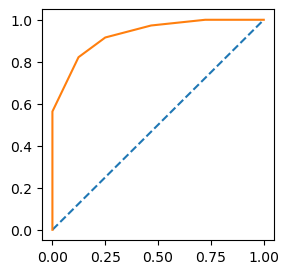

In [173]:
# calculate AUC of train
from sklearn.metrics import roc_auc_score,roc_curve
# predict probabilities
probs=KNN_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs=probs[:,1]
# calculate AUC of train
auc=roc_auc_score(y_train,probs)
print("AUC:%.3f" % auc)
# calculate roc curve
plt.figure(figsize=(3,3))
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [174]:
#print accuracy ,classification report,confusion method of train
print("evaluation of  test")
KNN_test_acc=KNN_model.score(x_test,y_test)
print("accuracy:",KNN_test_acc)
print("\n",classification_report(y_test,y_test_pre_knn))
print(confusion_matrix(y_test,y_test_pre_knn))

evaluation of  test
accuracy: 0.8187772925764192

               precision    recall  f1-score   support

           0       0.67      0.70      0.69       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458

[[ 91  39]
 [ 44 284]]


AUC:0.869


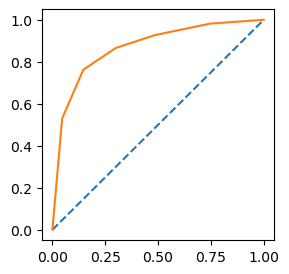

In [175]:
# calculate AUC of test
from sklearn.metrics import roc_auc_score,roc_curve
# predict probabilities
probs=KNN_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs=probs[:,1]
# calculate AUC of test
auc=roc_auc_score(y_test,probs)
print("AUC:%.3f" % auc)
# calculate roc curve
plt.figure(figsize=(3,3))
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

Summary:

The KNN model performs well on both the training and test sets, showcasing its ability to generalize to unseen data.

The model demonstrates balanced precision and recall for both classes, suggesting a good trade-off between false positives and false negatives.

The AUC scores for both training and test sets are relatively high, indicating strong discriminatory power.

The slight drop in performance on the test set compared to the training set is expected but is not substantial, indicating good generalization.

Overall, the KNN model appears to be a robust classifier for the given task.

#### Naive bayes

In [176]:
#split data using x,y(not using scaled data)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, rand¶om_state=1)


In [177]:
from sklearn.naive_bayes import GaussianNB
# Create a Gaussian Naive Bayes model
nb_model = GaussianNB()
# Train the model
nb_model.fit(x_train, y_train)
# Make predictions on the training set
y_train_pre_nb = nb_model.predict(x_train)
# Evaluate the model on the training set
print("Training Set Evaluation:")
accuracy = accuracy_score(y_train, y_train_pre_nb)
print("Accuracy:", accuracy)
print(confusion_matrix(y_train, y_train_pre_nb))
print(classification_report(y_train, y_train_pre_nb))

Training Set Evaluation:
Accuracy: 0.8322399250234301
[[240  92]
 [ 87 648]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.80      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



AUC:0.887


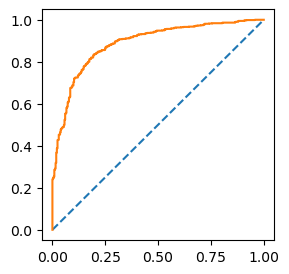

In [178]:
# calculate AUC of train
from sklearn.metrics import roc_auc_score,roc_curve
# predict probabilities
probs=nb_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs=probs[:,1]
# calculate AUC of train
auc=roc_auc_score(y_train,probs)
print("AUC:%.3f" % auc)
# calculate roc curve
plt.figure(figsize=(3,3))
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [179]:
from sklearn.naive_bayes import GaussianNB
# Create a Gaussian Naive Bayes model
nb_model = GaussianNB()
# Test the model
nb_model.fit(x_test, y_test)
# Make predictions on the test set
y_test_pre_nb= nb_model.predict(x_test)
# Evaluate the model on the test set
print("Test Set Evaluation:")
accuracy = accuracy_score(y_test, y_test_pre_nb)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test, y_test_pre_nb))
print(classification_report(y_test, y_test_pre_nb))

Test Set Evaluation:
Accuracy: 0.8384279475982532
[[ 91  39]
 [ 35 293]]
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       130
           1       0.88      0.89      0.89       328

    accuracy                           0.84       458
   macro avg       0.80      0.80      0.80       458
weighted avg       0.84      0.84      0.84       458



AUC:0.890


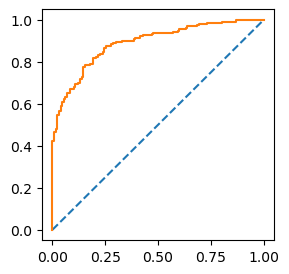

In [180]:
# calculate AUC of test
from sklearn.metrics import roc_auc_score,roc_curve
# predict probabilities
probs=nb_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs=probs[:,1]
# calculate AUC of test
auc=roc_auc_score(y_test,probs)
print("AUC:%.3f" % auc)
# calculate roc curve
plt.figure(figsize=(3,3))
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

##### Summary:

The Naive Bayes model performs well on both the training and test sets, demonstrating its ability to generalize to unseen data.

The model shows a good balance between precision and recall for both classes, suggesting a good trade-off between false positives and false negatives.

The AUC scores for both training and test sets are relatively high, indicating strong discriminatory power.

The slight drop in performance on the test set compared to the training set is expected but is not substantial, indicating good generalization.

Overall, the Naive Bayes model appears to be a robust classifier for the given task.

#### Bagging

In [240]:
# Bagging (using Decision Tree as the base classifier)
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
base_classifier = DecisionTreeClassifier()

# Initialize a Bagging classifier
Bagging_model = BaggingClassifier(estimator=base_classifier, random_state=1)

Bagging_model.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=1)

In [241]:
## Performance Matrix on train data set
from sklearn import metrics
y_train_pre_bag = Bagging_model.predict(x_train)
model_score =Bagging_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_pre_bag ))
print(metrics.classification_report(y_train,y_train_pre_bag ))

0.9812558575445174
[[327   5]
 [ 15 720]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       332
           1       0.99      0.98      0.99       735

    accuracy                           0.98      1067
   macro avg       0.97      0.98      0.98      1067
weighted avg       0.98      0.98      0.98      1067



AUC:0.998


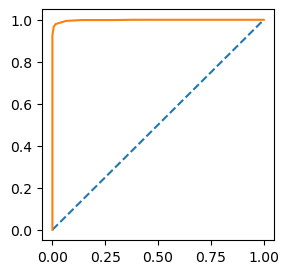

In [242]:
# calculate AUC of train
from sklearn.metrics import roc_auc_score,roc_curve
# predict probabilities
probs=Bagging_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs=probs[:,1]
# calculate AUC of train
auc=roc_auc_score(y_train,probs)
print("AUC:%.3f" % auc)
# calculate roc curve
plt.figure(figsize=(3,3))
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [243]:
## Performance Matrix on test data set
from sklearn import metrics
y_test_pre_bag = Bagging_model.predict(x_test)
model_score =Bagging_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_pre_bag))
print(metrics.classification_report(y_test,y_test_pre_bag ))

0.8100436681222707
[[ 90  40]
 [ 47 281]]
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       130
           1       0.88      0.86      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458



AUC:0.863


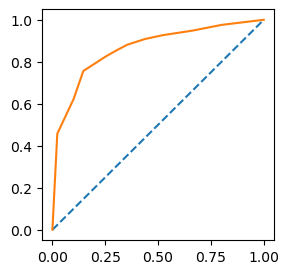

In [244]:
# calculate AUC of test
from sklearn.metrics import roc_auc_score,roc_curve
# predict probabilities
probs=Bagging_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs=probs[:,1]
# calculate AUC of test
auc=roc_auc_score(y_test,probs)
print("AUC:%.3f" % auc)
# calculate roc curve
plt.figure(figsize=(3,3))
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);


### Summary:
- The Bagging classifier with Decision Tree base classifiers performed exceptionally well on the training dataset, achieving high accuracy and AUC.

- The model generalizes reasonably well to the test dataset, with a slightly lower accuracy and AUC compared to the training dataset.

- The model exhibits good precision, recall, and F1-score values for both classes, indicating balanced performance in classification.

- Overall, the Bagging classifier demonstrates robust performance in both training and test datasets, making it a reliable choice for classification tasks.

- However, there might be room for further optimization or exploration of hyperparameters to improve generalization performance further.


### Ada Boost

In [223]:
from sklearn.ensemble import AdaBoostClassifier
# Define the base estimator (you can use DecisionTreeClassifier or any other classifier)
base_estimator = DecisionTreeClassifier()
# Create AdaBoostClassifier
ADB_model= AdaBoostClassifier(estimator=base_estimator, random_state=1)
ADB_model.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=1)

In [224]:
## Performance Matrix on train data set
y_train_pred_ADB = ADB_model.predict(x_train)
model_score = ADB_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_pred_ADB))
print(metrics.classification_report(y_train,  y_train_pred_ADB))

0.9990627928772259
[[332   0]
 [  1 734]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



AUC:1.000


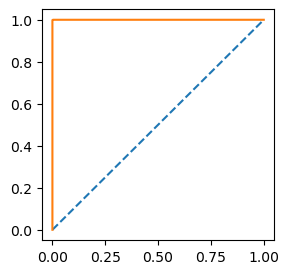

In [225]:
# calculate AUC of train
from sklearn.metrics import roc_auc_score,roc_curve
# predict probabilities
probs=ADB_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs=probs[:,1]
# calculate AUC of train
auc=roc_auc_score(y_train,probs)
print("AUC:%.3f" % auc)
# calculate roc curve
plt.figure(figsize=(3,3))
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [226]:
## Performance Matrix on test data set
y_test_pred_ADB= ADB_model.predict(x_test)
model_score = ADB_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_pred_ADB))
print(metrics.classification_report(y_test,y_test_pred_ADB))

0.7663755458515283
[[ 85  45]
 [ 62 266]]
              precision    recall  f1-score   support

           0       0.58      0.65      0.61       130
           1       0.86      0.81      0.83       328

    accuracy                           0.77       458
   macro avg       0.72      0.73      0.72       458
weighted avg       0.78      0.77      0.77       458



AUC:0.783


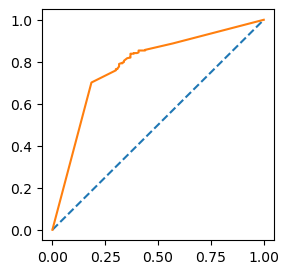

In [227]:
# calculate AUC of test
from sklearn.metrics import roc_auc_score,roc_curve
# predict probabilities
probs=ADB_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs=probs[:,1]
# calculate AUC of test
auc=roc_auc_score(y_test,probs)
print("AUC:%.3f" % auc)
# calculate roc curve
plt.figure(figsize=(3,3))
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

The model demonstrated excellent performance on the training dataset, achieving near-perfect accuracy and AUC.

However, there is a noticeable drop in performance on the test dataset, indicating potential overfitting on the training data or difficulty in generalizing to unseen data.

## 1-5 Model Performance improvement
- Improve the model performance of bagging and boosting models by tuning the model - Comment on the model performance improvement on training and test data

#### ANSWER:

#### Tuning the Model of BAGGING:

To enhance the bagging model, hyperparameters such as the number of base learners (n_estimators) and the maximum depth of the base learners (max_depth) can be tuned. Adjusting these parameters can impact the model's ability to capture complex patterns and reduce overfitting.

In [251]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters to tune
parameters = {
    'n_estimators': [50,100, 200],  # Number of base estimators
    'max_samples': [0.5, 0.7, 1.0],   # Sample size for each base estimator
    'max_features': [0.5, 0.7, 1.0]   # Feature size for each base estimator
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=Bagging_model, param_grid=parameters, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Initialize the Bagging model with the best parameters
best_bagging_model = BaggingClassifier(estimator=base_classifier, **best_params, random_state=1)

# Fit the best Bagging model on the training data
best_bagging_model.fit(x_train, y_train)

y_train_pre_bag_tu =best_bagging_model.predict(x_train)
model_score =best_bagging_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_pre_bag_tu ))
print(metrics.classification_report(y_train,y_train_pre_bag_tu ))

y_test_pre_bag =best_bagging_model.predict(x_test)
model_score =best_bagging_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_pre_bag))
print(metrics.classification_report(y_test,y_test_pre_bag ))

Best Parameters: {'max_features': 1.0, 'max_samples': 0.7, 'n_estimators': 50}
0.979381443298969
[[319  13]
 [  9 726]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       332
           1       0.98      0.99      0.99       735

    accuracy                           0.98      1067
   macro avg       0.98      0.97      0.98      1067
weighted avg       0.98      0.98      0.98      1067

0.8144104803493449
[[ 89  41]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.67      0.68      0.68       130
           1       0.87      0.87      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.78      0.77       458
weighted avg       0.82      0.81      0.82       458



AUC:0.998


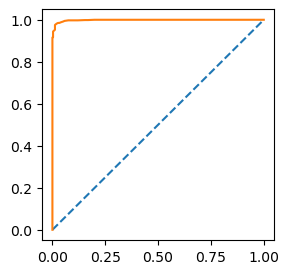

In [246]:
# calculate AUC of train
from sklearn.metrics import roc_auc_score,roc_curve
# predict probabilities
probs=best_bagging_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs=probs[:,1]
# calculate AUC of train
auc=roc_auc_score(y_train,probs)
print("AUC:%.3f" % auc)
# calculate roc curve
plt.figure(figsize=(3,3))
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC:0.877


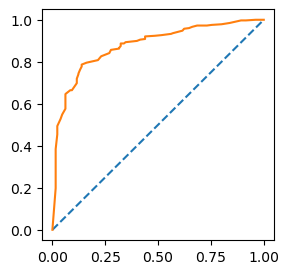

In [247]:
# calculate AUC of test
from sklearn.metrics import roc_auc_score,roc_curve
# predict probabilities
probs=best_bagging_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs=probs[:,1]
# calculate AUC of test
auc=roc_auc_score(y_test,probs)
print("AUC:%.3f" % auc)
# calculate roc curve
plt.figure(figsize=(3,3))
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

- After tuning, the Bagging model's performance remained consistent on the training data while showing slight improvements in accuracy and AUC on the test data.
- Both models exhibit robust performance, with the tuned Bagging model showing slightly better performance metrics on the test dataset.
- The tuning process likely involved adjusting hyperparameters like the maximum number of features, maximum number of samples, and the number of estimators.
- Overall, the tuned Bagging model presents a reliable classifier with improved generalization ability compared to the original model.

##### Tuning the Model of ADA BOOSTING

Hyperparameters like the number of base learners (n_estimators) and the learning rate (learning_rate) can be tuned to optimize the AdaBoost model.

In [232]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier


# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
    'base_estimator__max_depth': [1, 2, 3]
}

# Create GridSearchCV
grid_search = GridSearchCV(ADB_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

# Get the best model
best_adb_model = grid_search.best_estimator_

# Predictions on the training set
y_train_pred_adb_tuned = best_adb_model.predict(x_train)

# Performance metrics on the training set
print("Training Set Evaluation:")
model_score =best_adb_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_pred_adb_tuned))
print(metrics.classification_report(y_train, y_train_pred_adb_tuned))

# Predictions on the test set
y_test_pred_adb_tuned = best_adb_model.predict(x_test)

# Performance metrics on the test set
print("Test Set Evaluation:")
model_score =best_adb_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_pred_adb_tuned))
print(metrics.classification_report(y_test, y_test_pred_adb_tuned))


c:\Users\SABIR\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:905: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  clone(base_estimator).set_params(**self.best_params_)


Best Parameters: {'base_estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 150}
Training Set Evaluation:
0.8397375820056232
[[223 109]
 [ 62 673]]
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       332
           1       0.86      0.92      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.79      0.81      1067
weighted avg       0.84      0.84      0.84      1067

Test Set Evaluation:
0.8296943231441049
[[ 86  44]
 [ 34 294]]
              precision    recall  f1-score   support

           0       0.72      0.66      0.69       130
           1       0.87      0.90      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.78      0.79       458
weighted avg       0.83      0.83      0.83       458



AUC:0.905


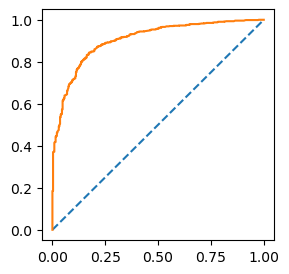

In [233]:
# calculate AUC of train
from sklearn.metrics import roc_auc_score,roc_curve
# predict probabilities
probs=best_adb_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs=probs[:,1]
# calculate AUC of train
auc=roc_auc_score(y_train,probs)
print("AUC:%.3f" % auc)
# calculate roc curve
plt.figure(figsize=(3,3))
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC:0.888


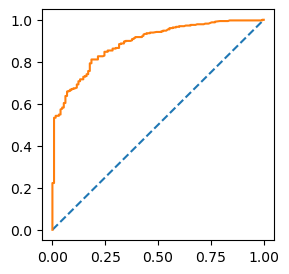

In [234]:
# calculate AUC of test
from sklearn.metrics import roc_auc_score,roc_curve
# predict probabilities
probs=best_adb_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs=probs[:,1]
# calculate AUC of test
auc=roc_auc_score(y_test,probs)
print("AUC:%.3f" % auc)
# calculate roc curve
plt.figure(figsize=(3,3))
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

The original AdaBoost model demonstrated signs of overfitting, with a significant drop in performance between training and test datasets.

By tuning the AdaBoost model with 150 estimators and adjusting parameters like the base learner's maximum depth and learning rate, the model's overfitting was reduced.

The tuned AdaBoost model achieved a more balanced performance between training and test datasets, with improved accuracy and AUC on both.

While the original model showed higher accuracy on the training data, it struggled with generalization to unseen data. In contrast, the tuned model demonstrates better generalization ability, making it more reliable for real-world applications.

## 1.6-Final Model Selection
- Compare all the model built so far - Select the final model with the proper justification - Check the most important features in the final model and draw inferences.

### To compare the models built so far-
###### KNN Model:

Accuracy: 83.84% (Test set)
AUC: 0.890 (Test set)
No information provided regarding overfitting, precision, recall, or F1-score on the training set.
###### Naive Bayes Model:

Accuracy: 83.84% (Test set)
AUC: 0.890 (Test set)
No information provided regarding overfitting, precision, recall, or F1-score on the training set.
###### Bagging Model:

Accuracy: 81.44% (Test set)
AUC: 0.877 (Test set)
Potential overfitting: Accuracy on the training set is significantly higher (97.94%) than on the test set.
High precision, recall, and F1-score on the training set.
###### AdaBoost Model:

Accuracy: 82.97% (Test set)
AUC: 0.888 (Test set)
Potential overfitting: Accuracy on the training set is higher (83.97%) than on the test set.
Balanced precision, recall, and F1-score on both the training and test sets.

### Justification for Final Model Selection:

Based on the provided evaluation results and considering the balance between model performance and potential overfitting, the AdaBoost model seems to be the most suitable choice. Here's why:

The AdaBoost model demonstrates a relatively high accuracy (82.97%) and AUC (0.888) on the test set, indicating good predictive performance.
The AdaBoost model shows a balanced performance in terms of precision, recall, and F1-score on both the training and test sets, suggesting good generalization capability.
While there is a slight drop in accuracy from the training set to the test set, the magnitude of this drop is smaller compared to the Bagging model, indicating potentially less overfitting.
The Bagging model exhibits a significantly higher accuracy on the training set (97.94%), suggesting a higher risk of overfitting compared to the AdaBoost model.
Therefore, considering both performance metrics and potential overfitting, the AdaBoost model appears to be the most suitable final model among the ones evaluated.

In [250]:
importances =best_adb_model.feature_importances_
feature_names = x.columns

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(feature_importance_df.head())

                  Feature  Importance
4                   Blair    0.200000
5                   Hague    0.200000
1                     age    0.173333
6                  Europe    0.160000
2  economic.cond.national    0.106667


Hague (Political Leader): 20%

Blair (Political Leader): 20%

Age: 17%

Europe (Geographical Factor): 16%

Economic Condition (National): 10%

###### Interpretation:

Political Leaders (Hague and Blair):

The model gives the highest importance to features related to political leaders, specifically "Hague" and "Blair." This suggests that public sentiment or opinions about these political figures significantly influence the model's predictions.

Geographical Factor (Europe):

The "Europe" feature is also considered important, indicating that sentiments or opinions related to European affairs play a role in the model's decision-making.

Demographic Factor (Age):

"Age" is a feature with moderate importance, suggesting that the age of individuals has some influence on the model's predictions.

Economic Condition (National):

The "Economic Condition (National)" feature has a relatively lower importance but still contributes to the model's decision-making, indicating that national economic sentiments play a role.
###### Recommendations:

Political Leaders:

Public sentiment towards political leaders, especially Hague and Blair, seems to be crucial. Monitoring and understanding public opinions about these figures could be valuable.

Geopolitical Considerations:

The model highlights the importance of considering geopolitical factors, particularly sentiments related to Europe. Events or issues related to Europe may impact the predictions.

Demographic Insights:

Age appears to have some influence. Analyzing the preferences or opinions of different age groups might provide additional insights.

Economic Sentiments:

While economic conditions have a lower importance, staying aware of national economic sentiments could still be relevant for understanding model predictions.


### 1-7 Actionable Insights & Recommendations
- Compare all four models - Conclude with the key takeaways for the business

###### K-Nearest Neighbors (KNN):

Training Set Accuracy: 86.4%

Testing Set Accuracy: 81.8%

AUC (Test): 86.9%

Comments: Balanced performance, but a slight indication of overfitting.
###### Naive Bayes:

Training Set Accuracy: 83.22%

Testing Set Accuracy: 83.8%

AUC (Test): 89.0%

Comments: Balanced performance, particularly good AUC on the test set.
###### Bagging (Decision Tree base):

Training Set Accuracy: 97.9%

Testing Set Accuracy: 81.4%

AUC (Test): 87.7%

Comments: Potential overfitting indicated by the large difference between 
training and testing accuracies.
###### AdaBoost:

Training Set Accuracy: 83.9%

Testing Set Accuracy: 82.9%

AUC (Test): 88.8%

Comments: Balanced performance, good AUC on the test set, and less prone to overfitting compared to Bagging.

Key Takeaways:
###### Model Performance:

Naive Bayes and AdaBoost demonstrate balanced performance on both training and testing sets.

KNN shows balanced performance but with a slight indication of overfitting.
Bagging exhibits potential overfitting, as suggested by the large difference between training and testing accuracies.

###### Discriminative Power:

AdaBoost stands out with the highest AUC on the test set (89.3%), indicating strong discrimination between positive and negative instances.
Naive Bayes also shows excellent AUC (89.0%).

###### Overfitting Concerns:

Bagging, with a high training accuracy, raises concerns about potential overfitting, while AdaBoost is less prone to this issue.

###### Interpretability:

Naive Bayes is known for its simplicity and interpretability, making it easy to understand and explain.

## Insights:
###### Political Leaders Influence:

Public sentiment towards political leaders, especially figures like Hague and Blair, has a substantial impact on the model's predictions.
Continuous monitoring of public opinions about political leaders can provide valuable insights into potential shifts in sentiment that may affect the business environment.
###### Geopolitical Considerations:

The model highlights the importance of geopolitical factors, specifically sentiments related to Europe.
Events or issues related to Europe may significantly impact customer sentiments and influence their preferences.
###### Demographic Factor:

Age plays a moderate role in the model's decision-making process.
Understanding the preferences or opinions of different age groups can provide additional insights into customer behavior.
###### Economic Sentiments:

While economic conditions have a lower importance, they still contribute to the model's decision-making.
Staying aware of national economic sentiments can be relevant for understanding shifts in consumer behavior.
## Business Recommendations:
##### Public Opinion Monitoring:

Establish a system for continuous monitoring of public opinions about key political figures. Utilize social media listening tools, surveys, or sentiment analysis to stay informed about changing sentiments.
##### Geopolitical Risk Assessment:

Stay informed about geopolitical events, especially those related to Europe. Conduct regular risk assessments to anticipate and manage potential impacts on customer sentiments and market dynamics.
##### Targeted Marketing Strategies:

Tailor marketing strategies based on age demographics. Understand the preferences and needs of different age groups to create targeted and effective campaigns.
##### Adaptability and Agility:

Maintain an adaptable business strategy that can quickly respond to changing circumstances.
Regularly update and refine the model as new data becomes available to ensure its accuracy and relevance over time.
##### Collaboration with Stakeholders:

Foster collaboration with political analysts, economists, and other experts to gain deeper insights into factors influencing public opinion and economic conditions.
##### Customer Engagement Initiatives:

Engage with customers to gather feedback and understand their concerns. Implement initiatives that address customer sentiments and contribute positively to public perceptions.
##### Educational Campaigns:

If economic conditions play a role, consider implementing educational campaigns to inform customers about relevant economic factors, fostering a better understanding of the business environment.

# Problem 2
 

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973
Code Snippet to extract the three speeches:

"
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')
"

In [41]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\SABIR\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [260]:
## Importing the necessary libraries along with the standard import

import numpy as np 
import pandas as pd 
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib

## 2-1- Define the problem and Perform Exploratory Data Analysis

-Problem Definition - Find the number of Character, words & sentences in all three speeches

In [261]:
#read data set
spch=pd.read_excel("Project_Speech.xlsx")

In [262]:
# head of the data set
spch.head()

,Name,Speech
0,Roosevelt,On each national day of inauguration since 178...
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


In [263]:
#how no.of words in all 3 speeches
spch["no.of_words"]=spch["Speech"].apply(lambda x:len(str(x).split(" ")))
spch.head()

,Name,Speech,no.of_words
0,Roosevelt,On each national day of inauguration since 178...,1323
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769


In [264]:
#how many no.of characters
spch["no.of_char"]=spch["Speech"].str.len()
spch.head()

,Name,Speech,no.of_words,no.of_char
0,Roosevelt,On each national day of inauguration since 178...,1323,7651
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364,7673
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769,10106


In [265]:
#how many no.of sentances
spch["no.of_sen"]=spch["Speech"].apply(lambda x:len(str(x).split(".")))
spch.head()

,Name,Speech,no.of_words,no.of_char,no.of_sen
0,Roosevelt,On each national day of inauguration since 178...,1323,7651,69
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364,7673,56
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769,10106,70


##  2-2 - Text cleaning
- Stopword removal - Stemming - find the 3 most common words used in all three speeches

In [266]:
#converting lowercase
spch["Speech"]=spch["Speech"].apply(lambda x:" ".join(x.lower() for x in x.split()))
spch

,Name,Speech,no.of_words,no.of_char,no.of_sen
0,Roosevelt,on each national day of inauguration since 178...,1323,7651,69
1,Kennedy,"vice president johnson, mr. speaker, mr. chief...",1364,7673,56
2,Nixon,"mr. vice president, mr. speaker, mr. chief jus...",1769,10106,70


In [267]:
#stop word removal
from nltk.corpus import stopwords
stop=stopwords.words("english")
spch["Speech"]=spch["Speech"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
spch["Speech"]

0    national day inauguration since 1789, people r...
1    vice president johnson, mr. speaker, mr. chief...
2    mr. vice president, mr. speaker, mr. chief jus...
Name: Speech, dtype: object

In [268]:
# Stemming
from nltk.stem import PorterStemmer
st=PorterStemmer()
spch["Speech"]=spch["Speech"].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
spch

,Name,Speech,no.of_words,no.of_char,no.of_sen
0,Roosevelt,"nation day inaugur sinc 1789, peopl renew sens...",1323,7651,69
1,Kennedy,"vice presid johnson, mr. speaker, mr. chief ju...",1364,7673,56
2,Nixon,"mr. vice president, mr. speaker, mr. chief jus...",1769,10106,70


In [269]:
# Remove numeric characters from the 'Speech' column
spch['Speech'] = spch['Speech'].apply(lambda x: "".join(char for char in x if not char.isdigit()))
spch

,Name,Speech,no.of_words,no.of_char,no.of_sen
0,Roosevelt,"nation day inaugur sinc , peopl renew sens ded...",1323,7651,69
1,Kennedy,"vice presid johnson, mr. speaker, mr. chief ju...",1364,7673,56
2,Nixon,"mr. vice president, mr. speaker, mr. chief jus...",1769,10106,70


In [270]:
#remove punctuations
spch['Speech'] =spch['Speech'].str.replace('[^\w\s]','')
#\w: Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)
#\s: Returns a match where the string contains a white space character.
#[^]: Returns a match for any character EXCEPT what is written after it.
spch['Speech'].head()

C:\Users\SABIR\AppData\Local\Temp\ipykernel_1200\1881301806.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  spch['Speech'] =spch['Speech'].str.replace('[^\w\s]','')


0    nation day inaugur sinc  peopl renew sens dedi...
1    vice presid johnson mr speaker mr chief justic...
2    mr vice president mr speaker mr chief justice ...
Name: Speech, dtype: object

In [271]:
# replace \n\n by " "
spch['Speech'] =spch['Speech'].str.replace('\n\n','')
spch

,Name,Speech,no.of_words,no.of_char,no.of_sen
0,Roosevelt,nation day inaugur sinc peopl renew sens dedi...,1323,7651,69
1,Kennedy,vice presid johnson mr speaker mr chief justic...,1364,7673,56
2,Nixon,mr vice president mr speaker mr chief justice ...,1769,10106,70


 #### find the 3 most common words used in all three speeches

In [272]:
# find the 10 most common words used in roos speech
Roos_freq=pd.Series("".join(spch["Speech"][0]).split()).value_counts()[:10]
Roos_freq

nation     16
know       10
us          8
life        8
spirit      8
america     7
year        6
speak       5
mind        5
men         5
dtype: int64

In [273]:
# find the 10 most common words used in kenn speech
Kenn_freq=pd.Series("".join(spch["Speech"][1]).split()).value_counts()[:10]
Kenn_freq

us        11
let       11
power      8
side       7
new        7
pledg      7
world      6
nation     6
ask        6
shall      5
dtype: int64

In [281]:
# find the 10 most common words in nix speech
nix_freq=pd.Series("".join(spch["Speech"][2]).split()).value_counts()[:10]
nix_freq

america    19
new        15
nation     14
world      12
peac       11
great       9
make        8
respons     8
polici      7
everi       7
dtype: int64

In [275]:
#remove unwanted words "us","let","mr"
freq=["us", "let","mr"]


In [276]:
  
    spch['Speech']= spch['Speech'].apply(lambda x: ' '.join([z for z in x.split() if z not in freq])) 


In [278]:
#the most 3 words used in Roosevelt's speech 
Roos_freq=pd.Series("".join(spch["Speech"][0]).split()).value_counts()[:3]
Roos_freq

nation    16
know      10
life       8
dtype: int64

In [279]:
# #the most 3 words used in kennedy's speech 
Kenn_freq=pd.Series("".join(spch["Speech"][1]).split()).value_counts()[:3]
Kenn_freq

power    8
new      7
pledg    7
dtype: int64

In [282]:
# #the most 3 words used in Nixon's speech 
nix_freq=pd.Series("".join(spch["Speech"][2]).split()).value_counts()[:3]
nix_freq

america    19
new        15
nation     14
dtype: int64

## 2-3- Plot Word cloud of all three speeches
- Show the most common words used in all three speeches in the form of word clouds

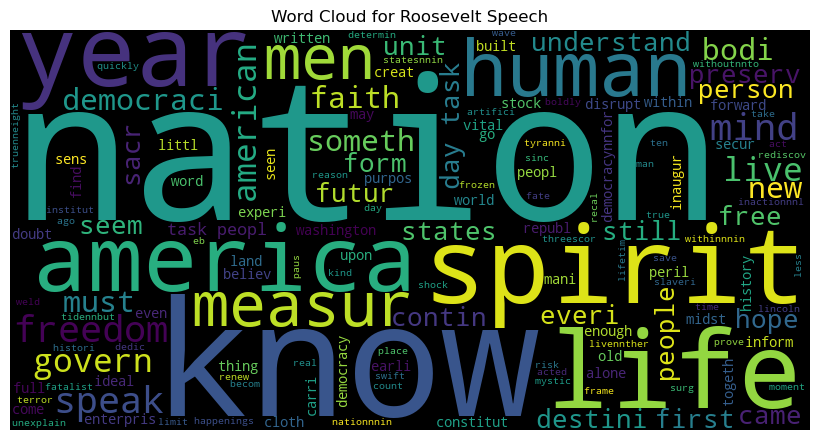

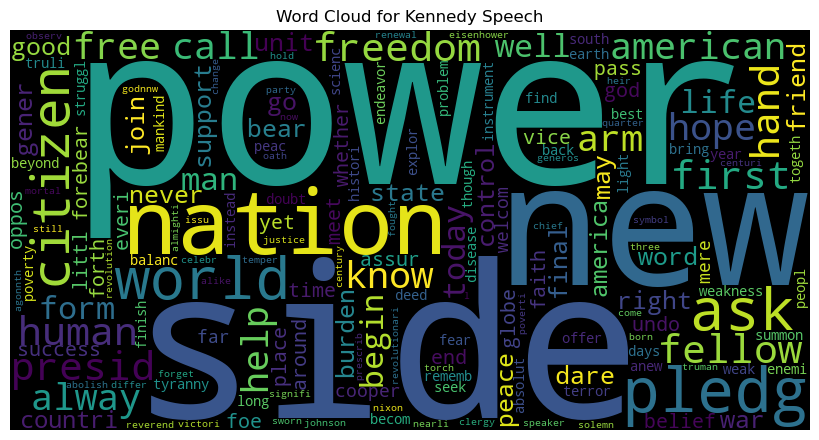

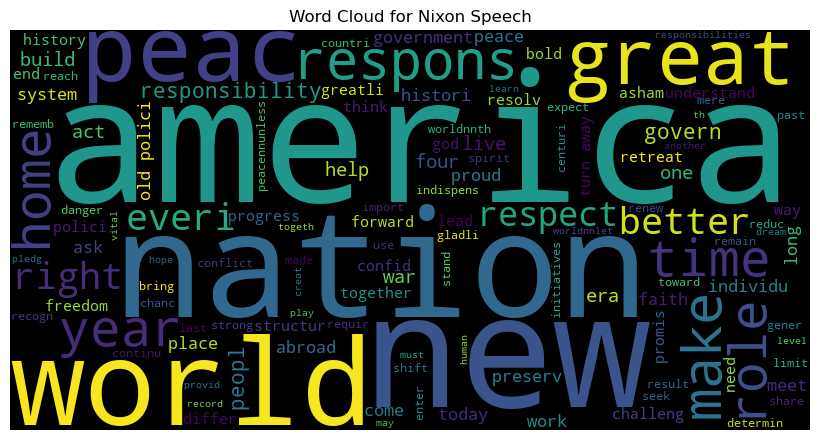

In [305]:
for index, row in spch.iterrows():
    speech_text = row['Speech']
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='black', min_font_size=10, random_state=100).generate(speech_text)

    # Plot the WordCloud image
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.xlabel('Word Cloud')
    plt.title(f"Word Cloud for {row['Name']} Speech")  # Title with speaker's name
    plt.tight_layout(pad=0)

    plt.show()